
## Peer-graded Assignment: Построение baseline-решений
Настало время перейти к построению моделей! Давайте начнем с построения так называемых бейзлайнов - построим несколько моделей, которые в дальнейшем будем использовать в качестве первого приближения для будущей модели. Часто для решения подобных задач используются линейные модели, а также ансамбли, например, случайный лес или градиентный бустинг.

В этом задании вам предстоит построить несколько моделей и оценить их качество. Эти модели будут служить нам в качестве baseline-решений и пригодятся сразу для нескольких задач:

- Во-первых, на разработку baseline-модели не должно уходить много времени (это требование исходит из оценок затрат на проект в целом - большую часть времени все же нужно потратить на основное решение), процесс должен быть простым, на подавляющем большинстве этапов должны использоваться готовые протестированные инструменты. Все это приводит к тому, что baseline-модели - это дешевый способ грубо оценить потенциально возможного качества модели, при построении которого вероятность допущения ошибок относительно невелика.
- Во-вторых, использование моделей разного типа при построении baseline'ов позволяет на раннем этапе предположить, какие подходы являются наиболее перспективными и приоритизировать дальнейшие эксперименты.
- Наличие baseline-моделей позволяет оценить, какой прирост качества дают различные преобразования, усложнения, оптимизации и прочие активности, которые вы предпринимаете для построения финального решения.
- Наконец, если после построения сложного решения оценка его качества будет очень сильно отличаться от оценки качества baseline-моделей, то это будет хорошим поводом поискать в решении ошибки.  

Задание будет оцениваться на основе jupyter notebook'а, который вам нужно будет приложить в качестве решения. Убедитесь, что он содержит всю проделанную вами работу, код написан аккуратно и понятно, его легко читать, а также в тексте notebook'а присутствуют необходимые для понимания проделанной вами работы комментарии.

## Инструкции
Обучите 3 разные baseline-модели на полученных наборах данных и оцените их качество.

На прошлой неделе вы выбрали методику оценки качества моделей на основе кросс-валидации, а также основную и вспомогательные метрики. Оцените с их помощью получившуюся модель.

Обратите внимание, что под разными моделями понимаются именно разные алгоритмы классификации. Например, 2 модели, реализующие метод k ближайших соседей с разными k, будут считаться одним baseline-решением (хотя и с разными параметрами).

Напоминаем, что отложенная выборка (hold-out dataset) не должна использоваться для построения и оценки baseline-моделей!

Можно (но не обязательно) рассмотреть следующий набор алгоритмов:

- Линейная модель (например, реализация sklearn.linear_model.RidgeClassifier)
- Случайный лес (например, реализация sklearn.ensemble.RandomForestClassifier)
- Градиентный бустинг (например, реализация sklearn.ensemble.GradientBoostingClassifier)   

В качестве решения приложите получившийся jupyter notebook. Убедитесь, что в нем присутствуют:

- все baseline-модели, которые вы построили;
- качество всех построенных моделей оценено с помощью кросс-валидации, и это понятно из текста в jupyter notebook;
- все модели оценены с помощью основной и дополнительных метрик качества.

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce
warnings.filterwarnings("ignore")

In [367]:
x_data = pd.read_csv('orange_small_churn_data.train.txt')
y_data = pd.read_csv('orange_small_churn_labels.train.txt', header=None)
y_data.columns = ['Churn']
y_data['Churn'] = [0 if x == -1 else x for x in y_data['Churn']]

In [368]:
Na_columns = []

for column in x_data.columns: # Колонки, полностью состоящие из NaN
    if x_data[column].isna().sum() == x_data.shape[0]:
        x_data.drop(column, axis=1,inplace=True)
        Na_columns.append(column)
        
numeric = x_data.loc[:,:'Var190'].columns  
categorical = x_data.loc[:,'Var190':].columns        

# Колонки с полностью отсутствующими значениями
len(Na_columns)

18

<AxesSubplot:xlabel='Features'>

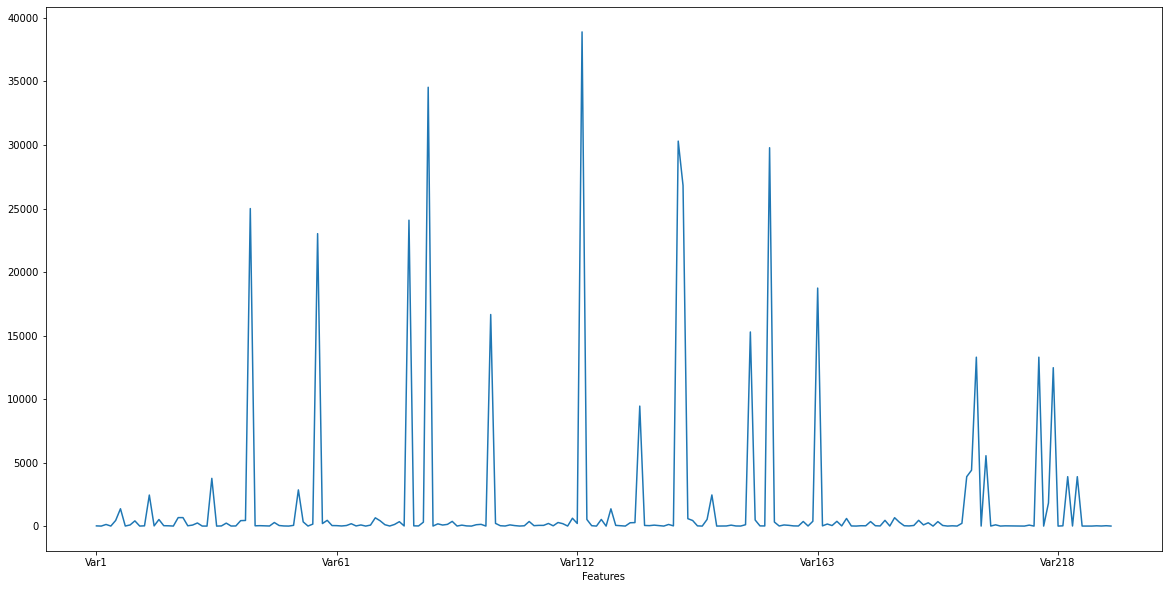

In [369]:
x_data.nunique().plot(figsize=(20, 10), xlabel='Features')

In [370]:
NaN70_columns = []

for column in x_data.columns: # Удаление колонок на 70% состоящих из NaN
    if x_data[column].isna().sum() >= x_data.shape[0]*0.7:
        x_data.drop(column, axis=1,inplace=True)
        NaN70_columns.append(column)
        
len(NaN70_columns)

138

In [371]:
X, X_hold_out, y, y_hold_out = train_test_split(x_data, 
                                                    y_data,
                                                    test_size=0.1, shuffle=False, random_state=42) 

In [372]:
X = pd.concat([X, X.isnull().sum(axis=1)], axis=1)

In [373]:
X.rename(columns={0:'MissInRow'}, inplace=True)
X

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229,MissInRow
0,3052.0,NaN,NaN,480.0,600.0,20.0,480.0,200.00,0.0,82752.0,...,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,13
1,1813.0,7.0,636.0,212.0,265.0,2.0,128.0,166.56,0.0,2706120.0,...,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,ELof,xb3V,RAYp,55YFVY9,mj86,0
2,1953.0,7.0,448.0,176.0,220.0,0.0,72.0,311.76,0.0,4698780.0,...,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,4
3,1533.0,7.0,4.0,332.0,415.0,0.0,144.0,220.08,5.0,864384.0,...,ylCK5YS,oslk,e4lqvY0,LM8l689qOp,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,8
4,686.0,7.0,0.0,160.0,200.0,2.0,48.0,278.00,0.0,4364880.0,...,PYpzAu9,oslk,MAz3HNj,LM8l689qOp,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,7777.0,7.0,6976.0,1344.0,1680.0,18.0,456.0,303.76,0.0,2700840.0,...,UF10FxM,oslk,BlJqCcD,LM8l689qOp,NaN,me1d,RAYp,TCU50_Yjmm6GIBZ0lL_,NaN,3
35996,252.0,7.0,312.0,36.0,45.0,0.0,56.0,187.28,0.0,0.0,...,gfMmfvd,oslk,GPSMujD,LM8l689qOp,kG3k,453m,RAYp,F2FyR07IdsN7I,am7c,3
35997,840.0,0.0,0.0,208.0,260.0,0.0,152.0,403.52,5.0,2148744.0,...,m1aw6jE,Al6ZaUT,e0RDN1n,LM8l689qOp,NaN,7P5s,02N6s8f,F2FyR07IdsN7I,NaN,4
35998,217.0,7.0,180.0,16.0,20.0,0.0,8.0,186.64,5.0,1686.0,...,Qui18fN,oslk,ep2j7qz,LM8l689qOp,NaN,5Acm,RAYp,F2FyR07IdsN7I,NaN,5


In [374]:
numeric = X.loc[:,:'Var189'].columns  
categorical = X.loc[:,'Var192':'Var229'].columns 

In [375]:
for column in X[numeric].columns:
    max = X[column].dropna()[X[column].dropna() != 0].max()
    X[column].fillna(max, inplace=True)
#     median = X[column].dropna()[X[column].dropna() != 0].median()
#     X[column].fillna(median, inplace=True)
    
X[categorical] = X[categorical].fillna(0) # Замена NaN категор.признаков соотв.категорией

In [376]:
# le = LabelEncoder()
# for column in X[categorical]:
#     X[column] = le.fit_transform(X[column])

# Frequency Encoding
for column in X[categorical].columns:
    enc_nom = (X.groupby(column).size()) / len(X)
    X[column] = X[column].apply(lambda x : enc_nom[x])

In [377]:
from sklearn.preprocessing import StandardScaler # Использование стандартизации

scaler = StandardScaler()

scaler.fit(X[numeric])

X[numeric] = scaler.transform(X[numeric])

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [379]:
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

In [380]:
skf = StratifiedKFold(n_splits=5, random_state=17)

In [381]:
#Построение моделей

# Logistic Regression

logreg = LogisticRegression(penalty='l2', random_state=42) #l2 при мультиколлинеарности признаков
logreg_model = logreg.fit(X_train, y_train)
lr_predictions = logreg.predict(X_test)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1_score= f1_score(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)

In [382]:
print(lr_recall, lr_f1_score, lr_roc_auc)

0.01107011070110701 0.021543985637342906 0.5048591767083186


In [383]:
# Gradient Boosting

gbc = GradientBoostingClassifier(random_state=42)
gbc_model = gbc.fit(X_train, y_train)
gbc_predictions = gbc.predict(X_test)
gbc_recall = recall_score(y_test, gbc_predictions)
gbc_f1_score = f1_score(y_test, gbc_predictions)
gbc_roc_auc = roc_auc_score(y_test, gbc_predictions)

In [384]:
print(gbc_recall, gbc_f1_score, gbc_roc_auc)

0.023985239852398525 0.04634581105169341 0.5115420341647093


In [385]:
# Random Forest

random_forest = RandomForestClassifier(random_state=42)
rfc_model = random_forest.fit(X_train, y_train)
rfc_predictions = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
rfc_recall = recall_score(y_test, rfc_predictions)
rfc_f1_score = f1_score(y_test, rfc_predictions)
rfc_roc_auc = roc_auc_score(y_test, rfc_predictions)

In [386]:
print(rfc_recall, rfc_f1_score, rfc_roc_auc)

0.0036900369003690036 0.007339449541284403 0.5017699208232694


In [387]:
gaussian = GaussianNB()
gauss_model = gaussian.fit(X_train, y_train)
gauss_predictions = gaussian.predict(X_test)
gauss_recall = recall_score(y_test, gauss_predictions)
gauss_f1_score= f1_score(y_test, gauss_predictions)
gauss_roc_auc = roc_auc_score(y_test, gauss_predictions)

In [388]:
gauss_roc_auc

0.5589419381727612

In [389]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1_score= f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)

In [390]:
knn_roc_auc

0.5010829576604567